#**About Jamboree**
An Indian Institute offering comprehensive classroom preparation programs for tests such as GMAT,GRE,SAT,TOEFL and IELTS.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

#**Goal of this Business Case**
👉understanding what factors are important in graduate admissions and how
these factors are interrelated among themselves.

👉It will also help predict one's chances of admission given the rest of the variables.

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt , seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Jamboree_Admission.csv to Jamboree_Admission.csv


In [5]:
df = pd.read_csv("Jamboree_Admission.csv")

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#**Exploratory Data Analysis**

In [7]:
df.shape

(500, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB




*   There is no Null Values in the given Data set.
*   The data type of columns are of Integer and Float type



In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<Axes: xlabel='Research', ylabel='Chance of Admit '>

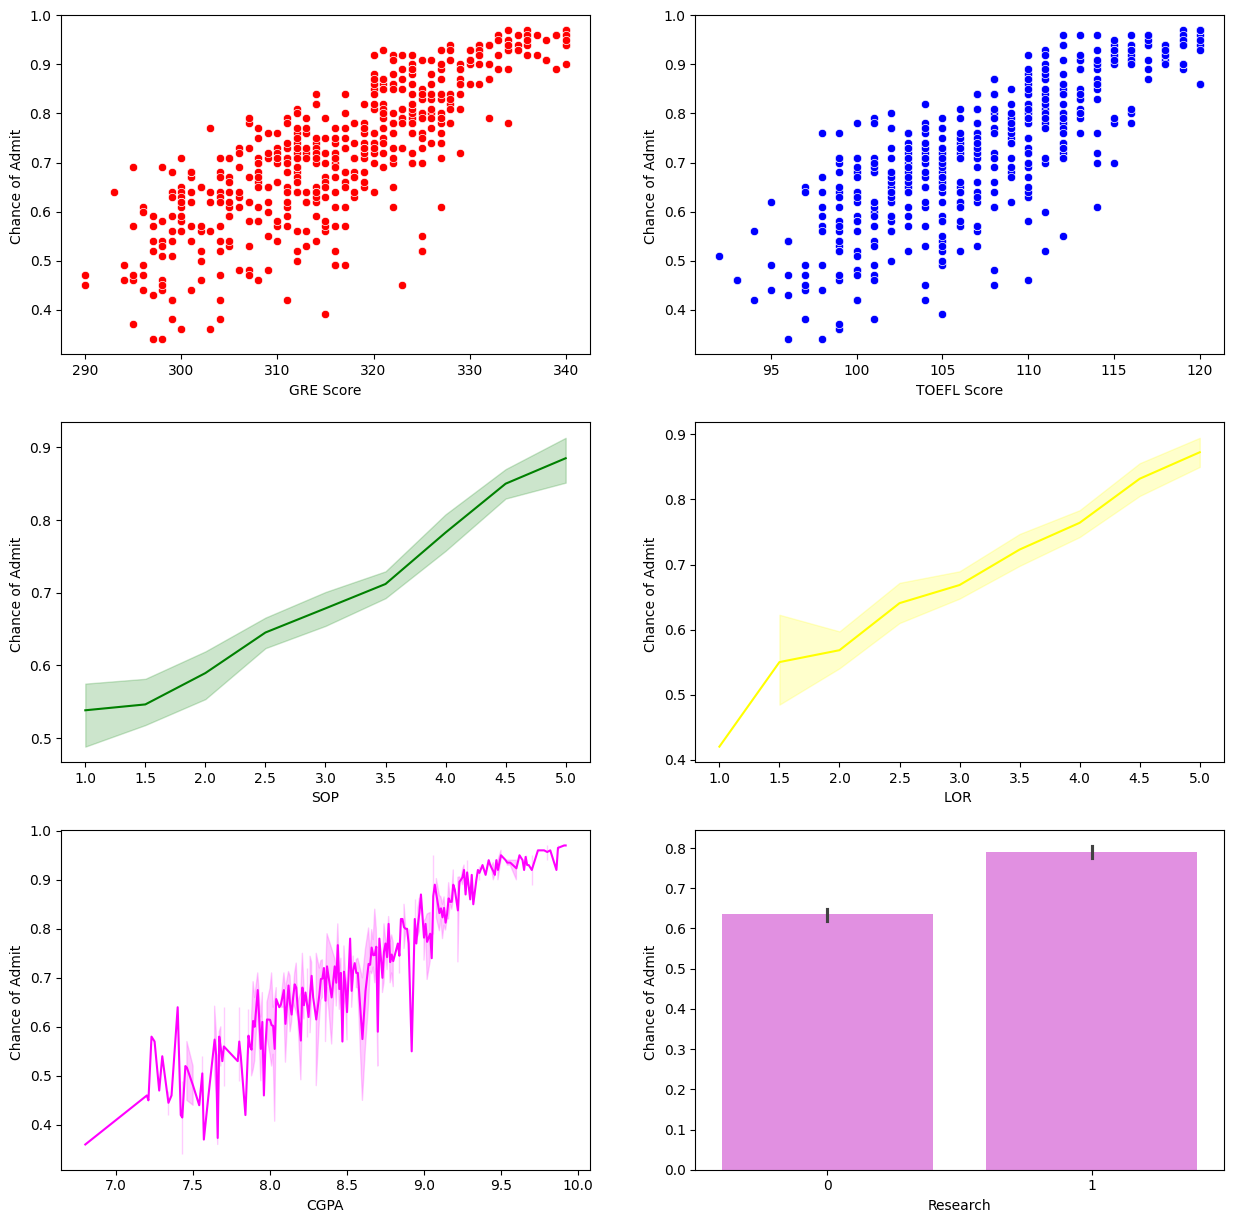

In [46]:
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df,color="red")

plt.subplot(3,2,2)
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df,color="blue")

plt.subplot(3,2,3)
sns.lineplot(x='SOP', y='Chance of Admit ', data=df,color="green")

plt.subplot(3,2,4)
sns.lineplot(x='LOR ', y='Chance of Admit ', data=df,color="yellow")

plt.subplot(3,2,5)
sns.lineplot(x='CGPA', y='Chance of Admit ', data=df,color="magenta")

plt.subplot(3,2,6)
sns.barplot(x='Research', y='Chance of Admit ', data=df,color="violet")


#**Insights**
*   From the above Scatter plots, its clear that the chances of admission increases with increase in GRE ,TOEFL Scores
*   The SOR and LOR also helps to get admission in the universities.
*   CGPA plays a major role to get placed
*   The Reasearch column has least effect in comparison to all others on chances of admission.





#**Linear Regression**

From the given dataset, we are dividing it into two categories such as Feature Variables and Target variables.

**Feature Variables(X):**
1. GRE Score
2. TOEFL Score
3. University Rating
4. SOP
5. LOR
6. Reaearch
7. CGPA

**Target(Y):**
1. Chance of Admit

In [49]:
Y = df[["Chance of Admit "]]
X = df.drop("Chance of Admit ",axis =1)

# **Train Test Split**

Split the given data into 80%(Training data) & 20%(Testing data)

In [50]:
import statsmodels.api as sm

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,random_state=2)

In [60]:
Y_train = np.array(Y_train)

**Lets Train our model using Stats Model Library**

In [55]:
X_sm = sm.add_constant(X_train)  # To add the intercept in Stats Model

model = sm.OLS(Y_train,X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sun, 12 May 2024   Prob (F-statistic):          6.94e-149
Time:                        15:24:33   Log-Likelihood:                 582.67
No. Observations:                 400   AIC:                            -1147.
Df Residuals:                     391   BIC:                            -1111.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3974      0.11

#**Assumptions of Linear Regression**

1.As we Know if our model follows the assumptions of Linear regression, then we can conclude that our model is a best fit one.

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(Y_train,X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sun, 12 May 2024   Prob (F-statistic):          6.94e-149
Time:                        16:12:57   Log-Likelihood:                 582.67
No. Observations:                 400   AIC:                            -1147.
Df Residuals:                     391   BIC:                            -1111.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7221      0.003    253.256      0.0

#**2.Multi Collinearity check**

If two two or more feature represents the same data then it is multi collinear, therefore we can remove those fetaures from the dataset.

To find the correlation between features we were using Variance Inflation Factor(VIF). It is used to detrmine the strenth of collinearity between independent variables.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled , columns= X_train.columns)
VIF["Features"] = X_t.columns
VIF["VIF"] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
VIF["VIF"] = round(VIF["VIF"],2)
VIF = VIF.sort_values(by ="VIF", ascending = False)
VIF

,Features,VIF
6,CGPA,4.79
1,GRE Score,4.25
2,TOEFL Score,4.09
4,SOP,2.77
3,University Rating,2.60
5,LOR,1.99
7,Research,1.47
0,Serial No.,1.05


The VIF values given by model are less than 5 which symbolizes **LOW MULTICOLLINEARITY**.

Linear regression model works well in such scenario. No need of removing/dropping any feature.

Let's check the next assumption.

#**3.Errors are Normally distributed**

In [65]:
X_sm = sm.add_constant(X_tr_scaled)
sm.model = sm.OLS(Y_train,X_sm).fit()

In [66]:
Y_hat = sm_model.predict(X_sm)
Error = Y_train - Y_hat

In [67]:
Error

array([[-0.04478363,  0.00606236,  0.0041455 , ...,  0.09085009,
         0.05985083,  0.13784086],
       [-0.06478363, -0.01393764, -0.0158545 , ...,  0.07085009,
         0.03985083,  0.11784086],
       [-0.01478363,  0.03606236,  0.0341455 , ...,  0.12085009,
         0.08985083,  0.16784086],
       ...,
       [-0.11478363, -0.06393764, -0.0658545 , ...,  0.02085009,
        -0.01014917,  0.06784086],
       [-0.19478363, -0.14393764, -0.1458545 , ..., -0.05914991,
        -0.09014917, -0.01215914],
       [-0.09478363, -0.04393764, -0.0458545 , ...,  0.04085009,
         0.00985083,  0.08784086]])

In [72]:
from scipy import stats
res = stats.shapiro(Error)
res.statistic

0.9976512789726257

If the Value is 1 or cloer to 1 , the we can conclude the errors are normaly distributed.

Here the value 0.997 denotes a high level of normality for the errror distribution

#**4.No Heteroscedasticity**

The Variance of residuals should be constant.

In [74]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Y_train, X_sm)
lzip(name, test)

[('F statistic', 0.9917824248315793), ('p-value', 0.5227053018600268)]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.0772 => Implying minimal difference in variance between groups
- p-value of 0.3032 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

#**5.No Autocorrelation**

The Errors(residuals) should not form any pattern while plotting

In [82]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - Y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

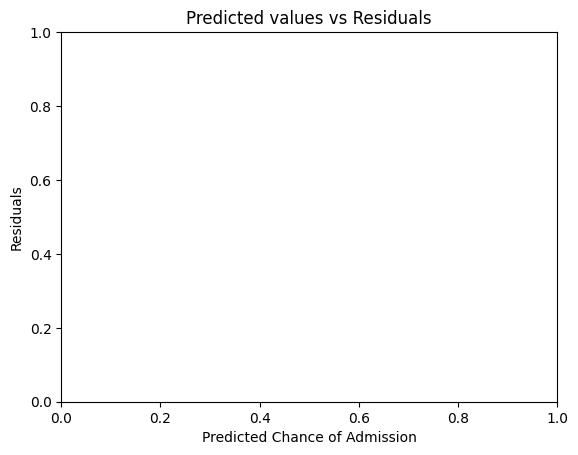

In [83]:
sns.scatterplot(X=Y_hat,Y=errors)
plt.xlabel("Predicted Chance of Admission")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

# **CONCLUSION**

After applying all the tests above we come to the conculsion that the data provided to us can be modeled using Linear Regression model.

The data provided has no unwanted features so we can use all of those for the prediction of their impact on the given data.

1. Students having high GRE Score and TOEFL Score have high chances of getting admission in Unviersities with high rating.
2. Students secring high CGPA have very high chance of admission.
3. Research is not a very important feature to get admission.

# **RECOMMENDATIONS**

I would like to recommend the following -
1. Students looking for Admission in the Ivy league colleges should aim for high TOEFL, GRE and CGPA.
2. Universities can be identified by looking at their ratings.
3. Jamboree can use the above analysis to mention on their website the important factors for admission in Ivy league colleges.
4. Jamboree can help the students improve TOEFL, GRE and CGPA score of the students by introducing practice papers, mock test, etc.